<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/iris_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn #for neural netwrok
import torch.nn.functional as F #for moving neural network forward

In [4]:
#create a model class that inhereits nn.Module
class Model(nn.Module):
  #input layer(4 features of the flower)-->hidden layer 1(no of neurons)-->h2-->output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x


In [5]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model= Model()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [7]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#encoding last column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#train test split : x&y
X=df.drop('species',axis=1).values #note: .values convert this data into a numpy array
y=df['species'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
#convert x features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [13]:
#convert y features into tensors long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [14]:
#set the criterion of model to measure the error, how far off the predictions are from the data
criterion=nn.CrossEntropyLoss()
#choose an optimizer, lr=learning rate(if error doesnt go down after a bunch of iterations(epochs), lower our learnign rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [15]:
#train our model
#epochs? (one run thru all the trinaing data in our network)
epochs=100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train) #get predicted results

  #measure the loss/error, gonna be high at first
  loss=criterion(y_pred,y_train)

  #keep track of our losses
  losses.append(loss.detach().numpy()) #converting loss into a numpy

  #do some back propagation: take the error rate of forward propagation and feed it back
    #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and the loss:{loss}')



Epoch: 0 and the loss:1.1251550912857056
Epoch: 10 and the loss:1.0096259117126465
Epoch: 20 and the loss:0.8157405853271484
Epoch: 30 and the loss:0.585706353187561
Epoch: 40 and the loss:0.3999636471271515
Epoch: 50 and the loss:0.2676880657672882
Epoch: 60 and the loss:0.17942363023757935
Epoch: 70 and the loss:0.12151690572500229
Epoch: 80 and the loss:0.0860118418931961
Epoch: 90 and the loss:0.06520850956439972


Text(0, 0.5, 'Loss/error')

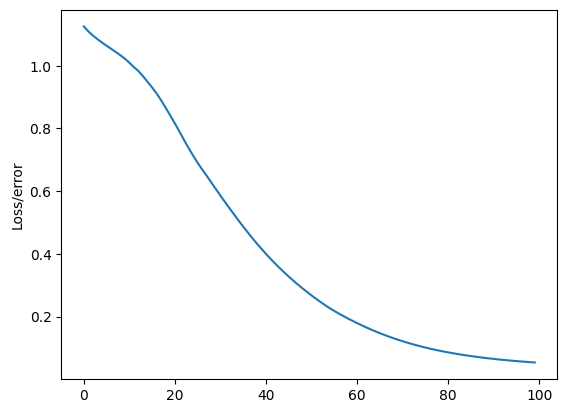

In [16]:
#graph
plt.plot(range(epochs),losses)
plt.ylabel('Loss/error')

In [17]:
#Evaluate model (validate)
with torch.no_grad(): #basically turn off back propagation
    y_eval=model.forward(X_test) # X_test are features from our test set, Y_eval will be predictions
    loss= criterion(y_eval,y_test) #finding loss

In [19]:
loss #here as it shows the loss is 0.1315 and the y_test we got was 0.0652 from the last itr/epoch

tensor(0.1315)

In [24]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)

    #will tell us what type of flower class our network thinks it is
    print(f'{i+1}. {str(y_val)} {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct +=1

print(f'we got {correct} correct!')

1. tensor([-5.8760,  4.4628,  6.5124]) 2 	 2
2. tensor([-7.5436,  4.1670,  9.7255]) 2 	 2
3. tensor([-8.4504,  5.1271, 10.1987]) 2 	 2
4. tensor([-4.3398,  5.6267,  2.5608]) 1 	 1
5. tensor([-7.1825,  4.8754,  8.2992]) 2 	 2
6. tensor([-3.3974,  5.3463,  1.2803]) 1 	 1
7. tensor([-5.9231,  4.9822,  5.9997]) 2 	 2
8. tensor([-4.2881,  5.7003,  2.3889]) 1 	 1
9. tensor([-6.5356,  4.9257,  7.1260]) 2 	 2
10. tensor([-8.0509,  4.4129, 10.3286]) 2 	 2
11. tensor([-5.6762,  4.9500,  5.6215]) 2 	 2
12. tensor([ 4.5662, -2.2476, -2.8911]) 0 	 0
13. tensor([ 4.2571, -1.9967, -2.7330]) 0 	 0
14. tensor([-2.1108,  4.0515,  0.5799]) 1 	 1
15. tensor([ 3.4575, -1.2098, -2.3514]) 0 	 0
16. tensor([-5.4724,  5.1165,  5.0934]) 2 	 1
17. tensor([ 4.0557, -1.7949, -2.6492]) 0 	 0
18. tensor([-5.8075,  4.6053,  6.2458]) 1 	 2
19. tensor([ 4.4343, -2.1392, -2.8242]) 0 	 0
20. tensor([ 3.4527, -1.2514, -2.3660]) 0 	 0
21. tensor([-2.6189,  4.5619,  0.8574]) 1 	 1
22. tensor([-7.7412,  4.7377,  9.4199]) 2 	

In [25]:
#16 and 18 are incorrect but now if we change the random seed and random state to 32 instead of 41. The whole loss will be much closer and it will be 30/30 correct!